<img style="float:left" width="70%" src="../../documentacion/imagenes/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="10%" src="../../documentacion/imagenes/PythonLogo.svg">
<br style="clear:both;">


<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">7. Machine Learning</h2>


 
## Estudiante:

- Jose Luis Perez Gomez

In [9]:
%run 3.Importaciones.ipynb
%run 4.Variables_Clases.ipynb

In [10]:
display(HTML(html_h4('Realizo la importacion a Dataframe de los datos de los csv creados en la etapa de Prepocessing. ','purple')))
experimento_1_nor = pd.read_csv('../datos/experimento_stscaler_1.csv', sep=',')
experimento_2_nor = pd.read_csv('../datos/experimento_stscaler_2.csv', sep=',')
experimento_3_nor = pd.read_csv('../datos/experimento_stscaler_3.csv', sep=',')
experimento_4_nor = pd.read_csv('../datos/experimento_stscaler_4.csv', sep=',')
experimentos_all = pd.read_csv('../datos/experimento_stscaler_all.csv', sep=',')

experimentos_nor = [experimento_1_nor, experimento_2_nor, experimento_3_nor, experimento_4_nor]
experimentos_name = {'experimento_1':experimento_1_nor, 'experimento_2':experimento_2_nor, 'experimento_3':experimento_3_nor,'experimento_4':experimento_4_nor}


In [11]:
display(HTML(html_h4('Ejemplo de las primeras lineas del dataframe del experimento 1 una vez importado: ','purple')))
experimento_1_nor.head()

,Timestamp,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Key
0,54127.0,0.706905,-0.209767,-0.300367,-0.171649,-0.194181,-0.148753,-0.127158,-0.212310,-0.262072,0.065833,4.0
1,55056.0,0.442657,0.388821,-0.360866,-0.272784,-0.022794,0.113055,-0.145426,-0.402311,-0.457234,-0.267025,0.0
2,56038.0,-0.085838,1.137055,-0.069054,-0.164913,0.101319,-0.018501,-0.108762,0.072719,-0.087428,2.288348,0.0
3,57043.0,-0.306045,1.735642,-0.203514,-0.190153,-0.108077,-0.120645,-0.102417,-0.179586,-0.094779,0.183584,0.0
4,58203.0,-1.363036,1.585995,-0.311369,0.486949,0.053414,0.000831,-0.073136,-0.659798,-0.585097,-0.455837,0.0


# Comienzo con los experimentos para Machine Learning

# 1. Holdout

Conjunto de entrenamiento: 81% del total
Conjunto de validación: 9% del total
Conjunto de prueba: 10% del total

In [12]:
def evaluar_holdout_knn(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
   
    # Entreno el modelo
    model_KNN.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_knn = model_KNN.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    knn_ac = accuracy_score(y_val, y_predict_knn)
     
    # Evaluo el modelo con X_test
    y_predict_knn_test = model_KNN.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    knn_ac_test = accuracy_score(y_test, y_predict_knn_test)
        
    matriz_confusion_val = confusion_matrix(y_val, y_predict_knn)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_knn_test)
        
    return ((knn_ac), (matriz_confusion_val), (knn_ac_test), (matriz_confusion_test))


In [13]:
modelos_all_knn= []

for experimento_knn in experimentos_nor:
    
    modelos_all_knn.append(evaluar_holdout_knn(experimento_knn))

accuracy_score_knn = []
accuracy_score_test_knn =[]
matriz_confusion_knn = []
matriz_confusion_test_knn = []

for valores_knn in modelos_all_knn:

    accuracy_score_knn.append(valores_knn[0])
    accuracy_score_test_knn.append(valores_knn[2])
    matriz_confusion_knn.append(valores_knn[1])
    matriz_confusion_test_knn.append(valores_knn[3])



In [14]:
nombre_clases =  valores_key(experimento_1_nor)
indices_df = ['Exp_1','Exp_2','Exp_3','Exp_4']



,KNN
Exp_1,0.916667
Exp_2,0.857143
Exp_3,0.944444
Exp_4,0.789474


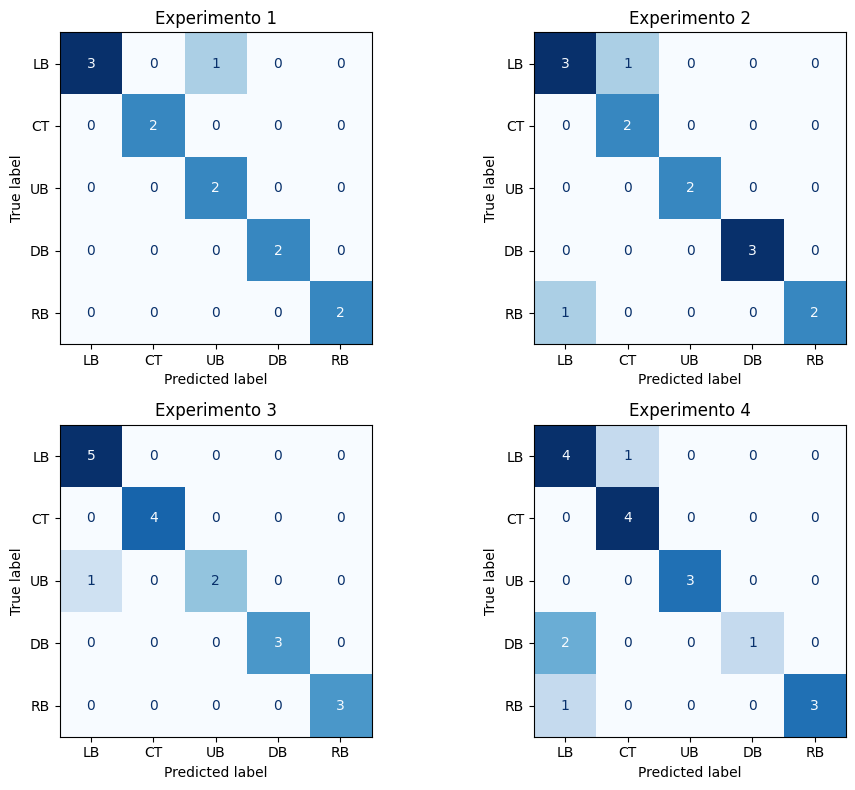

In [15]:


datos_holdout_knn = pd.DataFrame(accuracy_score_knn, columns=['KNN'], index=(indices_df))

display(datos_holdout_knn)

mc_knn = []

for matrices_knn in matriz_confusion_knn:

    mc_knn.append(pd.DataFrame(matrices_knn, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_knn[0], mc_knn[1], mc_knn[2], mc_knn[3]]
titulos = ["Experimento 1", "Experimento 2", "Experimento 3", "Experimento 4"]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


In [16]:

def evaluar_holdout_tree(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
    
    # Entreno el modelo
    model_TREE.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_tree = model_TREE.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    tree_ac = accuracy_score(y_val, y_predict_tree)
       
    # Evaluo el modelo con X_Test
    y_predict_tree_test = model_TREE.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    tree_ac_test = accuracy_score(y_test, y_predict_tree_test)
    
    
    matriz_confusion_val = confusion_matrix(y_val, y_predict_tree)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_tree_test)
        
    return ((tree_ac), (matriz_confusion_val), (tree_ac_test), (matriz_confusion_test))
    
    

In [17]:
modelos_all_tree= []

for experimento_tree in experimentos_nor:
    
    modelos_all_tree.append(evaluar_holdout_tree(experimento_tree))

accuracy_score_tree = []
accuracy_score_test_tree =[]
matriz_confusion_tree = []
matriz_confusion_test_tree = []

for valores_tree in modelos_all_tree:

    accuracy_score_tree.append(valores_tree[0])
    accuracy_score_test_tree.append(valores_tree[2])
    matriz_confusion_tree.append(valores_tree[1])
    matriz_confusion_test_tree.append(valores_tree[3])

    

,TREE
Exp_1,0.833333
Exp_2,0.857143
Exp_3,0.833333
Exp_4,0.789474


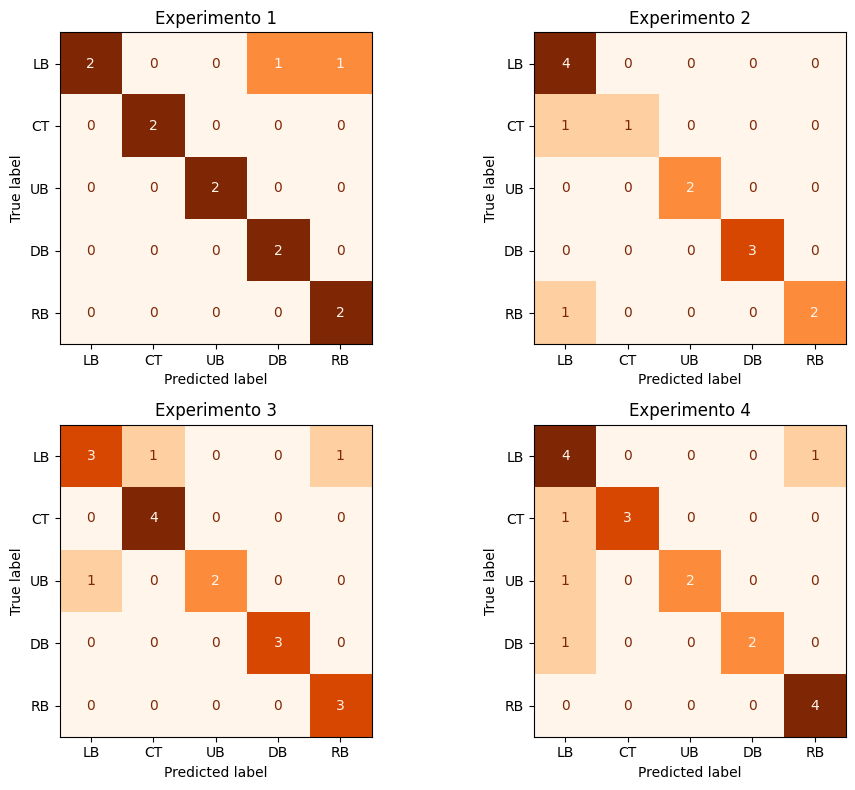

In [18]:
datos_holdout_tree = pd.DataFrame(accuracy_score_tree, columns=['TREE'], index=(indices_df))

display(datos_holdout_tree)

mc_tree = []

for matrices_tree in matriz_confusion_tree:

    mc_tree.append(pd.DataFrame(matrices_tree, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_tree[0], mc_tree[1], mc_tree[2], mc_tree[3]]
titulos = ["Experimento 1", "Experimento 2", "Experimento 3", "Experimento 4"]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Oranges')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()


In [19]:

def evaluar_holdout_random(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)

    # Entreno el modelo
    model_RANDOM.fit(X_train, y_train)
    
    # Evaluo el modelo con X_val
    y_predict_random = model_RANDOM.predict(X_val)
    
    # Evaluo el rendimiento que ha tenido Validation 
    random_ac = accuracy_score(y_val, y_predict_random)  
    
    # Evaluo el modelo con X_Test
    y_predict_random_test = model_RANDOM.predict(X_test)
    
    # Evaluo el rendimiento que ha tenido Validation 
    random_ac_test = accuracy_score(y_test, y_predict_random_test)
    
    matriz_confusion_val = confusion_matrix(y_val, y_predict_random)
    matriz_confusion_test = confusion_matrix(y_test, y_predict_random_test)
        
    return ((random_ac), (matriz_confusion_val), (random_ac_test), (matriz_confusion_test))
    
    

In [20]:
modelos_all_random= []

for experimento_random in experimentos_nor:
    
    modelos_all_random.append(evaluar_holdout_random(experimento_random))

accuracy_score_random = []
accuracy_score_test_random =[]
matriz_confusion_random = []
matriz_confusion_test_random = []

for valores_random in modelos_all_random:

    accuracy_score_random.append(valores_random[0])
    accuracy_score_test_random.append(valores_random[2])
    matriz_confusion_random.append(valores_random[1])
    matriz_confusion_test_random.append(valores_random[3])


,RANDOM
Exp_1,0.666667
Exp_2,0.571429
Exp_3,0.611111
Exp_4,0.473684


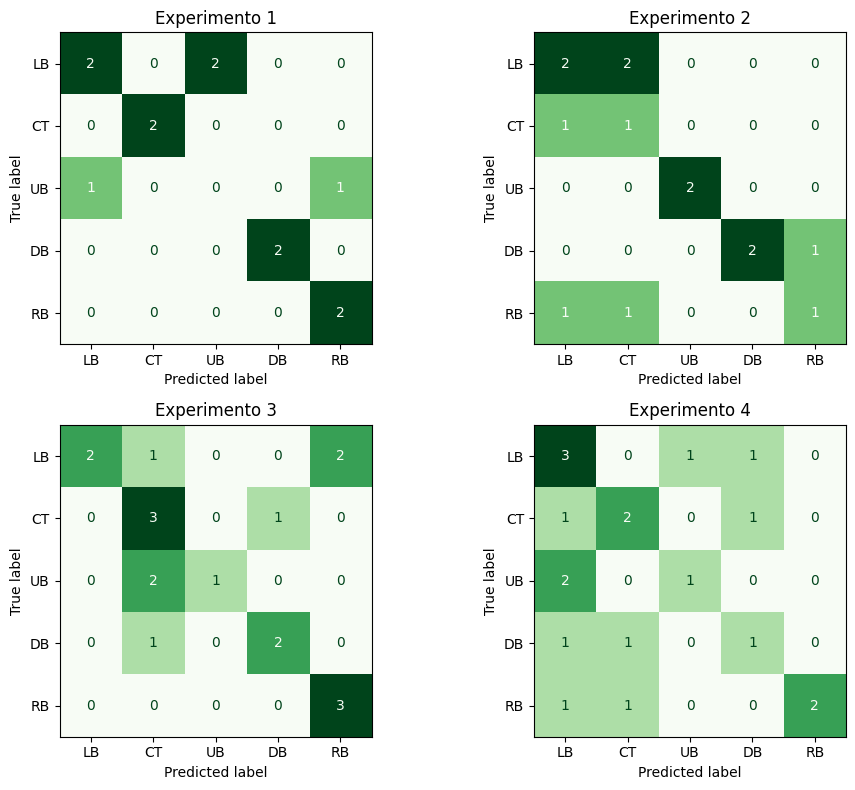

In [21]:
datos_holdout_random = pd.DataFrame(accuracy_score_random, columns=['RANDOM'], index=(indices_df))

display(datos_holdout_random)

mc_random = []

for matrices_random in matriz_confusion_random:

    mc_random.append(pd.DataFrame(matrices_random, index=nombre_clases, columns=nombre_clases))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

# Creo una figura y ejes para dividir el espacio en cuatro subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Matrices de confusión y títulos para cada subgráfico
dataframes = [mc_random[0], mc_random[1], mc_random[2], mc_random[3]]
titulos = ["Experimento 1", "Experimento 2", "Experimento 3", "Experimento 4"]

# Itero sobre los DataFrames y títulos para imprimir matriz de confusión en un subgráfico
for i, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
    fila = i // 2
    columna = i % 2
    ax = axs[fila, columna]
   
    # Se crea la impresion de la matriz de confusión y se implime
    disp = ConfusionMatrixDisplay(confusion_matrix=dataframe.values, display_labels=(nombre_clases))
    disp.plot(ax=ax, colorbar=False, cmap='Greens')
    
    # Añado el título al subgráfico
    ax.set_title(titulo)

# Se ajusta el espaciado entre subgráficos
plt.tight_layout()

# Se imprime el gráfico
plt.show()



In [22]:

datos_holdout = pd.concat([datos_holdout_knn, datos_holdout_tree, datos_holdout_random], axis=1)


datos_holdout.columns = pd.MultiIndex.from_tuples([("HoldOut","KNN"), ("HoldOut","TREE"), ("HoldOut","RANDOM")])



display(datos_holdout)

HoldOut                    
            KNN      TREE    RANDOM
Exp_1  0.916667  0.833333  0.666667
Exp_2  0.857143  0.857143  0.571429
Exp_3  0.944444  0.833333  0.611111
Exp_4  0.789474  0.789474  0.473684

 # k-fold cross-validation

In [23]:
#ACC_SCORER

def evaluar_cross_val(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)

    # Calculo las  metricas       
    knn = cross_val_score(model_KNN, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER) #X_val
    tree = cross_val_score(model_TREE, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER)  
    random = cross_val_score(model_RANDOM, X_train, y_train, cv=model_KFOLD, scoring=ACC_SCORER) 
    
    # Calculo la media de las metricas anteriores
    knn_mean = knn.mean()
    tree_mean = tree.mean()
    random_mean = random.mean()
    
    return ((knn_mean), (tree_mean), (random_mean))
    


In [24]:
modelos_all= []

for exp in experimentos_nor:
    
    modelos_all.append(evaluar_cross_val(exp))

datos_cross_val = pd.DataFrame(modelos_all)

#creo los valores nuevo para los indices de las filas 
nuevos_indices = {0: 'Exp_1', 1: 'Exp_2', 2: 'Exp_3', 3: 'Exp_4'}
# combio los valores anteriores en el dataframene con rename
datos_cross_val = datos_cross_val.rename(index=nuevos_indices)

datos_cross_val.columns = pd.MultiIndex.from_tuples([("KFold-CrossVal","KNN"), ("KFold-CrossVal","TREE"), ("KFold-CrossVal","RANDOM")])


In [25]:
display(datos_cross_val)

KFold-CrossVal                    
                 KNN      TREE    RANDOM
Exp_1       0.847273  0.824545  0.495455
Exp_2       0.892308  0.833333  0.395513
Exp_3       0.866250  0.745417  0.387917
Exp_4       0.787132  0.720956  0.345956

# leave-one-out

In [26]:
#LOO

def evaluar_loo(dataframe):
    
    X_train, y_train, X_val, y_val, X_test, y_test = dividir_datos(dataframe)
     
    # Calculo las  metricas       
    knn = cross_val_score(model_KNN, X_train, y_train, cv=LOO, scoring=ACC_SCORER)      #X_val
    tree = cross_val_score(model_TREE, X_train, y_train, cv=LOO, scoring=ACC_SCORER)  
    random = cross_val_score(model_RANDOM, X_train, y_train, cv=LOO, scoring=ACC_SCORER)

    # Calculo la media de las metricas anteriores
    knn_mean = knn.mean()
    tree_mean = tree.mean()
    random_mean = random.mean()

    return ((knn_mean), (tree_mean), (random_mean))

In [27]:
modelos_all= []

for exp in experimentos_nor:
    
    modelos_all.append(evaluar_loo(exp))

datos_loo = pd.DataFrame(modelos_all)
#creo los valores nuevo para los indices de las filas 
nuevos_indices = {0: 'Exp_1', 1: 'Exp_2', 2: 'Exp_3', 3: 'Exp_4'}
# combio los valores anteriores en el dataframene con rename
datos_loo = datos_loo.rename(index=nuevos_indices)

datos_loo.columns = pd.MultiIndex.from_tuples([("Leave-1-out","KNN"), ("Leave-1-out","TREE"), ("Leave-1-out","RANDOM")])




In [28]:
display(datos_loo)

Leave-1-out                    
              KNN      TREE    RANDOM
Exp_1    0.866667  0.857143  0.438095
Exp_2    0.884298  0.834711  0.504132
Exp_3    0.885350  0.738854  0.458599
Exp_4    0.809524  0.779762  0.392857

In [29]:


df_concatenado = pd.concat([datos_holdout, datos_cross_val, datos_loo], axis=1)


# display(df_concatenado)


In [30]:

#primer mayor valor en verde
#segundo mayor valor en amarillo 


def colorear_mayores(fila):
    mayores_indices = fila.nlargest(3).index  # Obtener los índices de los tres valores más grandes en la fila
    
    primer_mayor = mayores_indices[0]
    segundo_mayor = mayores_indices[1]
    tercer_mayor = mayores_indices[2]
    
    estilos = []
    for columna in fila.index:

        if columna == primer_mayor:
            estilo = 'background-color: green'
        elif columna == segundo_mayor:
            estilo = 'background-color: yellow'
        elif columna == tercer_mayor:
            estilo = 'background-color: orange'
        else:
            estilo = ''
        estilos.append(estilo)
    
    return estilos

comparativa_ml = df_concatenado.style.apply(colorear_mayores, axis=1)

display(comparativa_ml)



# Regresion Logistica

In [31]:


# probar regresion logistica

